# EDA and approach of WHO data

Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [2]:
life = pd.read_csv("Life Expectancy Data.csv")

Checking the types of the columns and search for null values

In [3]:
life.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [4]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [5]:
life.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [6]:
life.Region.unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

In [7]:
life[['Economy_status_Developing']].sum()

Economy_status_Developing    2272
dtype: int64

In [8]:
life[['Economy_status_Developed']].sum()

Economy_status_Developed    592
dtype: int64

In [9]:
# Looking at max life expectancy per year

LpY = life.groupby(['Year'])[['Life_expectancy']].max()
LpY

,Life_expectancy
Year,
2000,81.1
2001,81.4
2002,81.6
2003,81.8
2004,82.0
2005,81.9
2006,82.3
2007,82.5
2008,82.6


In [10]:
#  Total Life-expectancy per Region

LpR = life.groupby(['Region'])[['Life_expectancy']].mean()
LpR

,Life_expectancy
Region,
Africa,57.847304
Asia,69.454861
Central America and Caribbean,72.437500
European Union,77.715046
Middle East,73.975446
North America,77.841667
Oceania,69.517614
Rest of Europe,74.525417
South America,72.780729


In [11]:
# Max life_expectancy per region

LpR = life.groupby(['Region'])[['Life_expectancy']].max()
LpR

,Life_expectancy
Region,
Africa,76.1
Asia,83.8
Central America and Caribbean,79.6
European Union,83.2
Middle East,82.2
North America,81.9
Oceania,82.4
Rest of Europe,83.2
South America,79.6


### Graphical representations of data

#### Heatmap of all columns

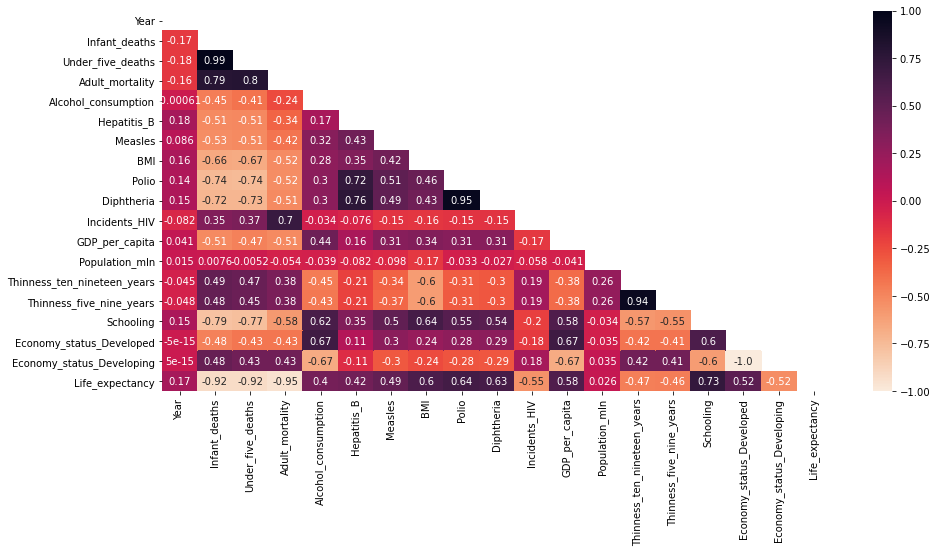

In [12]:
plt.figure(figsize = (15,7))
sns.heatmap(life.corr(), 
            annot = True,
           fmt = '.2',
           cmap = 'rocket_r',
           mask = np.triu(life.corr()),
           vmin = -1,
           vmax = 1)

plt.show()

#### Columns considered sensitive data:
* Hepatitis_B
* Measles
* BMI
* Polio
* Diphtheria
* Incidents_HIV
* Thinness_ten_nineteen_years
* Thinness_five_nine_years
* GDP_per_capita
           
#### Columns considered non-sensitive data:
* Year
* Infant_deaths
* Under_five_deaths
* Adult_mortality
* Alcohol_consumption
* Population_mln
* Schooling
* Economy_status_Developed
* Region_Asia
* Region_Central America and Caribbean
* Region_European Union
* Region_Middle East
* Region_North America
* Region_Oceania
* Region_Rest of Europe
* Region_South America

In [13]:
sensitive = ['Hepatitis_B','Measles','BMI',
           'Polio','Diphtheria','Incidents_HIV','Thinness_ten_nineteen_years','Thinness_five_nine_years','GDP_per_capita']

non_sensitive = ['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption','Population_mln','Schooling',
       'Economy_status_Developed','Region_Asia',
       'Region_Central America and Caribbean', 'Region_European Union',
       'Region_Middle East', 'Region_North America', 'Region_Oceania',
       'Region_Rest of Europe', 'Region_South America']

### Pairplots and scatter plots of highly correlated columns

Scatter plot of BMI and Life expectancy

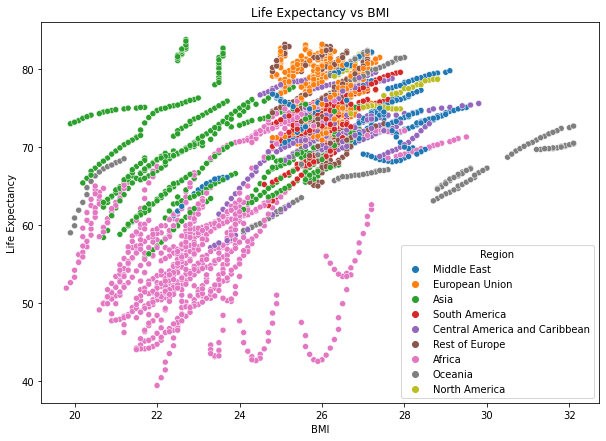

In [14]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x = "BMI", y = "Life_expectancy", hue = "Region", data = life, palette = "tab10")
plt.xlabel("BMI")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs BMI")
plt.show()

## Feature Engineering

#### Scaling Data

Scaling used was Robust Scaling
Columns scaled to fit the data:
* GDP
* Population
* Year

In [15]:
def feature_eng(df):
    '''Feature engineering funciton for WHO '''
    
    df = df.copy()
     # One Hot Encoding Region
    df = pd.get_dummies(life, columns = ['Region'], drop_first = True, prefix = 'Region')
    df.drop(columns = ['Country','Economy_status_Developing'],inplace = True) # Removing columns
    
    #Scaling the data 
    df_scale = df[['Year','GDP_per_capita','Population_mln']].copy()
    rob = RobustScaler() #initial Scaler
    rob.fit(df_scale) # Fit the data
    df_robust = pd.DataFrame(rob.transform(df_scale)) #Transform the data according to the scaler and make into df
    df_robust.rename(columns = {0:'Year_rob',1:'GDP_rob',2:'Population_rob'},inplace = True)# Rename columns
    
    #merge origional df+ohe with scaled values 
    df = df.join(df_robust)
    #remove duplicate columns
    df.drop(columns = ['Year','GDP_per_capita','Population_mln'], inplace = True) # drop columns because 
    # will have duplicates if leave in df.drop(columns=['Life_expectancy'],inplace=True)
    return df # returning the df with scaled data and ohe columns


In [16]:
# Checking the Feature engineering function

X_train_fe = feature_eng(life)
X_train_fe

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,...,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America,Year_rob,GDP_rob,Population_rob
0,11.1,13.0,105.8240,1.320,97,65,27.8,97,97,0.08,...,0,0,1,0,0,0,0,1.000000,0.609357,3.273738
1,2.7,3.3,57.9025,10.350,97,94,26.0,97,97,0.09,...,0,1,0,0,0,0,0,1.000000,1.932009,1.787402
2,51.5,67.9,201.0765,1.570,60,35,21.2,67,64,0.13,...,0,0,0,0,0,0,0,-0.066667,-0.281925,54.440019
3,32.8,40.5,222.1965,5.680,93,74,25.3,92,93,0.79,...,0,0,0,0,0,0,1,-0.200000,-0.006373,-0.328856
4,3.4,4.3,57.9510,2.890,97,89,27.0,94,94,0.08,...,0,0,1,0,0,0,0,0.600000,2.672770,0.002779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,0.49,...,0,0,0,0,0,0,0,-1.000000,-0.342690,0.161186
2860,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,0.02,...,0,0,0,0,0,0,0,0.200000,-0.152766,-0.239926
2861,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,0.02,...,0,0,0,0,0,0,0,-0.466667,-0.187322,0.534507
2862,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,0.05,...,0,1,0,0,0,0,0,-0.733333,0.287849,-0.204261


## Linear Regression Model

We excluded the following columns due to a high p-value or regarded as extra signal:
* Population_mln
* Country
* Alcohol_consumption
* Measles
* Polio
* Diphtheria
* Thinness_five_nine_years
* Economy_status_Developing

Region has been One Hot Encoded in the feature engineering model

### Train/Test Split

In [17]:
# Split the data into features (X) and target (y)

feature_cols = list(X_train_fe.columns)
feature_cols.remove('Life_expectancy')

In [18]:
X = X_train_fe[feature_cols]
y = X_train_fe['Life_expectancy']

In [19]:
# Perform the train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# Add a constant into the features as this will be needed as part of the linear regression

X_train_fe = sm.add_constant(X_train)
X_train_fe

,const,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America,Year_rob,GDP_rob,Population_rob
2026,1.0,7.9,9.3,111.2825,2.45,99,99,22.9,99,99,...,0,0,0,0,0,0,0,0.866667,-0.046943,0.598888
651,1.0,3.7,4.6,114.2985,13.42,98,98,26.6,96,98,...,0,1,0,0,0,0,0,-0.466667,0.884371,0.108847
2225,1.0,15.4,18.0,143.0785,6.60,78,83,26.6,79,78,...,0,0,0,0,0,0,1,0.866667,1.062628,1.027791
2357,1.0,11.8,13.3,80.9365,4.88,99,98,26.1,99,99,...,0,0,0,0,0,1,0,0.333333,-0.057444,-0.228810
670,1.0,43.3,74.4,495.7265,2.29,83,64,23.2,82,79,...,0,0,0,0,0,0,0,-0.600000,-0.082486,-0.276517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.0,30.8,37.8,184.9630,2.23,87,65,28.8,85,85,...,0,0,0,0,1,0,0,-1.000000,-0.118658,-0.358499
1095,1.0,54.8,72.9,283.9275,1.42,89,77,22.3,88,88,...,0,0,0,0,0,0,0,-0.866667,-0.272950,-0.335804
1130,1.0,23.1,27.5,135.0125,4.25,98,96,24.1,99,99,...,0,0,0,0,0,0,0,0.066667,-0.102143,-0.341362
1294,1.0,12.5,14.5,276.8135,6.82,97,96,26.0,95,96,...,0,0,0,0,0,1,0,-0.333333,-0.186065,1.818434


In [21]:
# Create the model
# Specify which features to use in the model

add_cols = ['const', 'Year_rob', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Hepatitis_B', 'BMI',
          'Incidents_HIV', 'GDP_rob', 'Thinness_ten_nineteen_years', 'Schooling', 'Economy_status_Developed',
          'Region_Asia', 'Region_Central America and Caribbean', 'Region_European Union', 'Region_Middle East',
          'Region_North America', 'Region_Oceania', 'Region_Rest of Europe', 'Region_South America']

# In testing, alcohol consumption, Measles, Polio, Diphtheria, Population_mln and Thinness_five_nine_years had P values
# much larger than 0.05 and so these features were removed to maximise the models performance

lin_reg = sm.OLS(y_train, X_train_fe[add_cols])
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     7480.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:16:19   Log-Likelihood:                -3646.0
No. Observations:                2291   AIC:                             7332.
Df Residuals:                    2271   BIC:                             7447.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   83.3235      0.595    140.014      0.000      82.157      84.491
Year_rob                                 0.2550      0.043      5.948      0.000       0.171       0.339
Infant_deaths                           -0.0575      0.006     -9.134      0.000      -0.070      -0.045
Under_five_deaths                       -0.0471      0.004    -12.052      0.000      -0.055      -0.039
Adult_mortality                         -0.0467      0.001    -76.937      0.000      -0.048      -0.046
Hepatitis_B                             -0.0064      0.002     -3.334      0.001      -0.010      -0.003
BMI                                     -0.1184      0.022     -5.337      0.000      -0.162      -0.075
Incidents_HIV                            0.1010      0.018      5.540      0.000       0.065       0.137
GDP_rob                                  0.2110      0.027      7.922      0.000       0.159       0.263
Thinness_ten_nineteen_years             -0.0164      0.009     -1.926      0.054      -0.033       0.000
Schooling                                0.1032      0.018      5.827      0.000       0.068       0.138
Economy_status_Developed                 2.4970      0.163     15.289      0.000       2.177       2.817
Region_Asia                              0.4185      0.111      3.775      0.000       0.201       0.636
Region_Central America and Caribbean     2.0419      0.120     17.079      0.000       1.807       2.276
Region_European Union                   -0.5749      0.173     -3.317      0.001      -0.915      -0.235
Region_Middle East                       0.3153      0.137      2.303      0.021       0.047       0.584
Region_North America                     0.7843      0.232      3.383      0.001       0.330       1.239
Region_Oceania                          -0.7759      0.143     -5.412      0.000      -1.057      -0.495
Region_Rest of Europe                    0.3484      0.137      2.536      0.011       0.079       0.618
Region_South America                     1.7650      0.132     13.404      0.000       1.507       2.023
==============================================================================
Omnibus:                       12.498   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.357
Skew:                           0.113   Prob(JB):                     0.000763
Kurtosis:                       3.315   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multico

#### R-squared: This shows how well the model is able to predict real data points and ranges from 0-1. At 0.984, this is a very good model

#### Cond. No.: This shows how much multicollinearity there is in the model. This is a large number stating that there is duplicated information in the model. To have lowered this we could have removed some columns/features however, based on the project brief, we believed that the more features left in the model the more user friendly it would be

Calculating the RMSE

In [22]:
# Model (train) predictions and calculate the RMSE metric

y_pred = results.predict(X_train_fe[add_cols])

rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(f'RMSE = {round(rmse, 2)} years')

RMSE = 1.19 years


#### This shows that our best performing model has an average error of 1.19 years or about 1-2% when considering life expectancies, which is a good outcome.

In [23]:
# Use model to predict test data and calculate the RMSE metric
# First add a constant to the testing data

X_test_fe=sm.add_constant(X_test)
X_test_fe.head()

,const,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America,Year_rob,GDP_rob,Population_rob
1590,1.0,14.3,16.7,176.6680,9.82,96,83,27.2,94,95,...,1,0,0,0,0,0,0,-0.200000,2.840435,-0.348309
1752,1.0,3.9,4.5,68.7755,9.45,88,86,27.1,95,95,...,0,0,0,0,0,1,0,0.866667,3.624279,2.628532
772,1.0,48.0,71.0,217.4790,5.93,70,71,23.7,92,92,...,1,0,0,0,0,0,0,-0.733333,-0.280938,-0.356647
1735,1.0,85.0,136.8,285.8990,1.44,73,83,22.1,78,78,...,0,0,0,0,0,0,0,-1.000000,-0.297184,-0.045391
387,1.0,4.3,4.9,79.5340,9.10,92,77,26.9,95,95,...,0,1,0,0,0,0,0,-0.466667,1.606732,0.144048


In [24]:
y_test_pred = results.predict(X_test_fe[add_cols])
rmse_test = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(f'RMSE = {round(rmse_test, 2)} years')

RMSE = 1.22 years


#### The RMSE value has gone up by 0.03 (from train to test), which may indicate a very minor overfitting but otherwise this is a very good result for our Best performing model

In [25]:
# Get parameters from the model

results.params

const                                   83.323530
Year_rob                                 0.255034
Infant_deaths                           -0.057525
Under_five_deaths                       -0.047062
Adult_mortality                         -0.046741
Hepatitis_B                             -0.006387
BMI                                     -0.118397
Incidents_HIV                            0.101031
GDP_rob                                  0.211037
Thinness_ten_nineteen_years             -0.016427
Schooling                                0.103207
Economy_status_Developed                 2.496974
Region_Asia                              0.418493
Region_Central America and Caribbean     2.041856
Region_European Union                   -0.574878
Region_Middle East                       0.315270
Region_North America                     0.784271
Region_Oceania                          -0.775927
Region_Rest of Europe                    0.348404
Region_South America                     1.765032


In [26]:
# Convert the coefficients into a dataframe

bp_model = pd.DataFrame(results.params, columns = ['Coefficient'])
bp_model.reset_index(inplace = True) # add an index

In [27]:
bp_model.rename(columns = {'index':'Features'}, inplace = True) # rename the originally created 'index' column to features
bp_model

,Features,Coefficient
0,const,83.323530
1,Year_rob,0.255034
2,Infant_deaths,-0.057525
3,Under_five_deaths,-0.047062
4,Adult_mortality,-0.046741
5,Hepatitis_B,-0.006387
6,BMI,-0.118397
7,Incidents_HIV,0.101031
8,GDP_rob,0.211037
9,Thinness_ten_nineteen_years,-0.016427


In [28]:
bp_model.Features[:]

0                                    const
1                                 Year_rob
2                            Infant_deaths
3                        Under_five_deaths
4                          Adult_mortality
5                              Hepatitis_B
6                                      BMI
7                            Incidents_HIV
8                                  GDP_rob
9              Thinness_ten_nineteen_years
10                               Schooling
11                Economy_status_Developed
12                             Region_Asia
13    Region_Central America and Caribbean
14                   Region_European Union
15                      Region_Middle East
16                    Region_North America
17                          Region_Oceania
18                   Region_Rest of Europe
19                    Region_South America
Name: Features, dtype: object

In [29]:
# Convert the dataframe into a csv file

bp_model.to_csv('bp_model.csv', index = False)

#### Creating the minimal model

In [30]:
# Create minimal model 
# Specify which features to use in the model - using non-sensitive features in this model

add_cols2 = ['const', 'Year_rob', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality','Schooling',
           'Economy_status_Developed','Region_Asia','Region_Central America and Caribbean', 'Region_European Union',
           'Region_Middle East','Region_North America','Region_Oceania','Region_Rest of Europe', 'Region_South America']


lin_reg2 = sm.OLS(y_train, X_train_fe[add_cols2])
results2 = lin_reg2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     9552.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:16:19   Log-Likelihood:                -3717.1
No. Observations:                2291   AIC:                             7464.
Df Residuals:                    2276   BIC:                             7550.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   79.6508      0.170    469.247      0.000      79.318      79.984
Year_rob                                 0.1995      0.044      4.552      0.000       0.114       0.285
Infant_deaths                           -0.0657      0.006    -10.299      0.000      -0.078      -0.053
Under_five_deaths                       -0.0415      0.004    -10.481      0.000      -0.049      -0.034
Adult_mortality                         -0.0452      0.000   -106.988      0.000      -0.046      -0.044
Schooling                                0.1058      0.016      6.645      0.000       0.075       0.137
Economy_status_Developed                 3.4505      0.143     24.135      0.000       3.170       3.731
Region_Asia                              0.4157      0.106      3.937      0.000       0.209       0.623
Region_Central America and Caribbean     1.8434      0.119     15.520      0.000       1.611       2.076
Region_European Union                   -1.2239      0.166     -7.361      0.000      -1.550      -0.898
Region_Middle East                       0.1948      0.132      1.473      0.141      -0.064       0.454
Region_North America                     0.4962      0.229      2.170      0.030       0.048       0.945
Region_Oceania                          -1.1710      0.134     -8.765      0.000      -1.433      -0.909
Region_Rest of Europe                    0.1553      0.136      1.141      0.254      -0.112       0.422
Region_South America                     1.6024      0.131     12.206      0.000       1.345       1.860
==============================================================================
Omnibus:                       14.559   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.637
Skew:                           0.190   Prob(JB):                     0.000663
Kurtosis:                       3.097   Cond. No.                     2.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R-squared: This has gone down by 0.001 from the best performing model hence, this is still a very good model

#### Cond. No.: This is still high therefore there is some duplicated information although it has come down from the best performing model

In [31]:
# Minimal model (train) predictions and calculate RMSE metric

y_pred2 = results2.predict(X_train_fe[add_cols2])

rmse2 = statsmodels.tools.eval_measures.rmse(y_train, y_pred2)

print(f'RMSE = {round(rmse2, 2)} years')

RMSE = 1.23 years


#### This result alone suggests a relatively good result. This is because our minimal model has an average error of 1.23 years when considered against the values of life expectancy, this is around 1-2%.

In [32]:
# Use minimal model to predict test data and calculate the RMSE metric

y_test_pred2 = results2.predict(X_test_fe[add_cols2])
rmse_test2 = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred2)
print(f'RMSE = {round(rmse_test2, 2)} years')

RMSE = 1.27 years


#### The RMSE value has once again gone up by a very small amount, 0.04 which is a good indicator that our minimal model handles unseen data well

In [33]:
results2.params

const                                   79.650756
Year_rob                                 0.199487
Infant_deaths                           -0.065692
Under_five_deaths                       -0.041486
Adult_mortality                         -0.045164
Schooling                                0.105802
Economy_status_Developed                 3.450456
Region_Asia                              0.415737
Region_Central America and Caribbean     1.843418
Region_European Union                   -1.223869
Region_Middle East                       0.194837
Region_North America                     0.496194
Region_Oceania                          -1.171019
Region_Rest of Europe                    0.155250
Region_South America                     1.602386
dtype: float64

In [34]:
# Create a dataframe out of the parameter results

minimal_model = pd.DataFrame(results2.params, columns = ['Coefficient'])
minimal_model.reset_index(inplace = True) # add an index

In [35]:
# Rename the index to features

minimal_model.rename(columns = {'index':'Features'}, inplace = True)
minimal_model

,Features,Coefficient
0,const,79.650756
1,Year_rob,0.199487
2,Infant_deaths,-0.065692
3,Under_five_deaths,-0.041486
4,Adult_mortality,-0.045164
5,Schooling,0.105802
6,Economy_status_Developed,3.450456
7,Region_Asia,0.415737
8,Region_Central America and Caribbean,1.843418
9,Region_European Union,-1.223869


In [36]:
# Convert the dataframe to a csv file

minimal_model.to_csv('minimal_model.csv', index = False)